# Project Sustainable Agro-Supply Chain Optimization
## Case Study : Demand & Price Forecasting for Indonesia Cayenne Paper

**Author** : Marsello Ormanda

**Date** : 01 Januari 2026

### Latar Belakang (Background)

Dalam industri pertanian, **Cabai Rawit** adalah komoditas dengan volatilitas harga yang ekstrem, terutama menjelang hari raya. Tantangan utama dalam rantai pasok (supply chain) komoditas ini adalah sifatnya yang mudah busuk dan permintaan yang ineslastis saat hari raya.

Masalah yang sering terjadi:
1. **Food Waste**: Stok berlebih saat permintaan rendah menyebabkan pembusukan.
2. **Stockout**: Kekurangan stok saat harga tinggi menyebabkan hilangnya potensi keuntungan.
3. **Inefesiensi Logistik**: Pengiriman yang tidak terencana menyebabkan tingginya jejak karbon.

#### Penjelasan Referensi

Dalam industri pertanian, cabai rawit (Capsicum frutescens) adalah komoditas dengan volatilitas harga yang ekstrem, terutama menjelang hari raya. Fluktuasi harga cabai rawit yang mencapai lebih dari 40% mengindikasikan permasalahan serius dalam manajemen pasokan, dengan harga dipengaruhi oleh harga periode sebelumnya, efek substitusi dengan cabai merah keriting, dan supply shocks. Volatilitas ini diperburuk oleh permintaan yang bersifat inelastis pada periode hari raya keagamaan seperti Ramadan dan Idul Fitri, di mana harga dapat melonjak drastis dalam waktu singkat meskipun pasokan relatif stabil. Tantangan utama dalam rantai pasok komoditas ini mencakup sifatnya yang mudah busuk (perishable) dan ketidakmampuan sistem distribusi dalam merespons dinamika permintaan yang cepat berubah (Wasita et al., 2025).
___

Masalah 1: Food Waste. Stok berlebih saat permintaan rendah menyebabkan pembusukan yang signifikan karena sifat perishable cabai rawit yang memiliki shelf life sangat terbatas tanpa perlakuan pasca panen yang memadai. Karakteristik perishability menjadi faktor fundamental dalam perencanaan rantai pasok, di mana forecasting permintaan yang tidak akurat menyebabkan petani dan distributor menanam atau memesan dalam jumlah berlebih yang tidak terserap pasar, mengakibatkan pembusukan sebelum produk mencapai konsumen akhir. Penelitian menunjukkan bahwa sekitar sepertiga dari produksi pangan global terbuang di sepanjang rantai pasok, dengan produk hortikultura perishable seperti cabai rawit menyumbang proporsi besar karena keterbatasan infrastruktur cold chain dan sistem distribusi yang tidak efisien (Birkmaier et al., 2024).
___

Masalah 2: Stockout. Kekurangan stok saat harga tinggi—terutama menjelang periode hari raya—menyebabkan hilangnya potensi keuntungan bagi petani dan distributor, sekaligus menciptakan tekanan inflasi pada konsumen. Ketidakmampuan memprediksi lonjakan permintaan dan keterbatasan siklus produksi cabai rawit yang memerlukan 75-90 hari dari tanam hingga panen membuat respons terhadap demand surge sangat terbatas. Pemantauan pasokan secara real-time dan integrasi pasar menjadi krusial untuk mitigasi stockout dan stabilisasi harga, namun fragmentasi pasar dan asimetri informasi dalam rantai distribusi cabai rawit di Indonesia memperburuk ketidakseimbangan pasokan-permintaan (Lestari et al., 2022).
___

Masalah 3: Inefisiensi Logistik. Pengiriman yang tidak terencana menyebabkan tingginya jejak karbon karena sektor logistik dan transportasi bertanggung jawab atas 36% dari emisi transportasi dan 23% dari total emisi gas rumah kaca global, dengan operasional cold chain untuk produk perishable mengkonsumsi energi sangat besar. Distribusi yang tidak teroptimasi—termasuk rute pengiriman tidak efisien dan konsolidasi muatan yang buruk—tidak hanya meningkatkan konsumsi bahan bakar dan emisi, tetapi juga mempercepat deteriorasi produk cabai rawit, mengurangi shelf life, dan meningkatkan proporsi produk rusak saat tiba di pasar. Penelitian menunjukkan bahwa optimisasi rute berbasis artificial intelligence dan perencanaan distribusi strategis dapat mengurangi jejak karbon hingga 24% sambil memperbaiki efisiensi rantai pasok secara keseluruhan (TURGUT & BUDAK, 2022).
___
Referensi

Birkmaier, A., Imeri, A., & Reiner, G. (2024). Improving supply chain planning for perishable food: data-driven implications for waste prevention. Zeitschrift Für Betriebswirtschaft. https://doi.org/10.1007/s11573-024-01191-x

Lestari, E. P., Prajanti, S. D. W., Wibawanto, W., & Adzim, F. (2022). ARCH-GARCH Analysis: An Approach to Determine The Price Volatility of Red Chili. AGRARIS: Journal of Agribusiness and Rural Development Research, 8(1), 90–105. https://doi.org/10.18196/agraris.v8i1.12060

TURGUT, A., & BUDAK, T. (2022). Carbon Footprint Of Logistics and Transportation: A Systematic Literature Review. Kent Akademisi. https://doi.org/10.35674/kent.1071319

Wasita, R., Hidayat, N. K., & Suprehatin, S. (2025). Effects of Supply and Commodity Substitution on Chili Price Volatility at Kramat Jati Wholesale Market, Jakarta, Indonesia. Agro Bali : Agricultural Journal, 8(3), 781–795. https://doi.org/10.37637/ab.v8i3.2244

### Tujuan

Project ini bertujuan untuk membangun model machine learning yang dapat memprediksi **harga** dan **volume penjualan** cabai rawit dengan mempertimbangkan faktor musiman. Dengan prediksi yang akurat, distributor dapat mengoptimalkan inventori, mengurangi limbah pangan, dan memaksimalkan profit.

## Library Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

print("Library telah berhasil di import!")

Library telah berhasil di import!


### 3. Pengenalan Data (Data Acquisition)

Dataset ini merupakan simulasi data penjualan harian dari sebuah distributor ritel selama 2 tahun (2024-2025). Data ini mensimulasikan kondisi nyata di lapangan (Real-world Data) yang seringkali "kotor" akibat input manual.

**Karakteristik Masalah pada Data:**
* **Inkonsistensi Format:** Tanggal dan angka ditulis dengan format beragam (Text/String).
* **Missing Values:** Data hilang akibat kelalaian pencatatan.
* **Outliers:** Kesalahan input (typo) yang ekstrem.
* **Noise:** Variasi penulisan nama produk dan supplier.

In [ ]:
# Load dataset
# Pastikan file 'data_cabai_season_final.csv' sudah diupload ke Colab
df = pd.read_csv('https://raw.githubusercontent.com/Marsello-or/Chilli-Paper-Demand-Forecasting/refs/heads/main/data_cabai_season_final.csv')

# Menampilkan 5 baris sampel acak untuk melihat kekotoran data
print("--- Sampel Data Mentah ---")
display(df.sample(5))

# Cek tipe data awal
print("\n--- Info Tipe Data Awal ---")
df.info()

--- Sampel Data Mentah ---


,Tanggal,Nama_Produk,Harga_Per_Kg,Terjual_Kg,Is_Holiday_Season,Nama_Season,Supplier
630,2025-09-22 00:00:00,Cabe Rawit Merah,41404,55,0.0,Normal,Pak Asep
612,2025-09-04 00:00:00,Cabai Rawit,36865,59,NaN,Normal,Tani Makmur
432,2025-03-08 00:00:00,Rawit Setan,33273,54,0.0,Normal,Pak Asep
399,2025-02-03 00:00:00,Cabai Rawit,37100,61,0.0,Normal,CV. Hijau
574,2025-07-28 00:00:00,Rawit Setan,36827,60,0.0,Normal,Pak Asep



--- Info Tipe Data Awal ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tanggal            730 non-null    object 
 1   Nama_Produk        730 non-null    object 
 2   Harga_Per_Kg       730 non-null    object 
 3   Terjual_Kg         730 non-null    object 
 4   Is_Holiday_Season  614 non-null    float64
 5   Nama_Season        730 non-null    object 
 6   Supplier           730 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.1+ KB


### 4. Data Cleaning (Pembersihan Data)

Karena data mentah tidak dapat diproses oleh model algoritma, kita akan melakukan pembersihan bertahap:
1.  **Temporal Cleaning:** Memperbaiki format Tanggal dan membuang data waktu yang invalid.
2.  **Numerical Cleaning:** Membersihkan karakter non-numerik (seperti "Rp", "kg") pada kolom Harga dan Penjualan.
3.  **Handling Missing Values:** Mengisi data kosong, terutama pada fitur krusial `Is_Holiday_Season` menggunakan **Domain Knowledge** (bukan sekadar rata-rata).

In [ ]:
# 1. Cleaning Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')
df = df.dropna(subset=['Tanggal']).sort_values('Tanggal')

# 2. Cleaning Numerik (Harga & Terjual)
# Membersihkan "Rp", "kg", dan karakter aneh lainnya
for col in ['Harga_Per_Kg', 'Terjual_Kg']:
    # Ambil hanya angka (digit)
    df[col] = df[col].astype(str).str.replace(r'[^\d]', '', regex=True)
    # Convert ke numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Pembersihan format dasar selesai.")
df.info()

Pembersihan format dasar selesai.
<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 0 to 729
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tanggal            710 non-null    datetime64[ns]
 1   Nama_Produk        710 non-null    object        
 2   Harga_Per_Kg       710 non-null    int64         
 3   Terjual_Kg         710 non-null    int64         
 4   Is_Holiday_Season  602 non-null    float64       
 5   Nama_Season        710 non-null    object        
 6   Supplier           710 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 44.4+ KB


### 5. Feature Engineering: Holiday Logic Imputation

Salah satu masalah utama dalam dataset ini adalah hilangnya informasi pada kolom `Is_Holiday_Season` (bernilai `NaN`).

Dalam kasus *Time Series* yang bergantung pada kalender, penggunaan teknik imputasi standar seperti **Mean (Rata-rata)** atau **Mode (Nilai terbanyak)** sangat **DILARANG**.
* *Contoh Salah:* Mengisi data kosong di tanggal 10 April (Lebaran) dengan "Normal" hanya karena mayoritas hari adalah "Normal". Ini akan merusak akurasi model.

**Solusi:**
Kita membangun fungsi logika (`get_season_status`) yang memetakan setiap tanggal ke status musimnya berdasarkan kalender hari raya Indonesia. Kita mendefinisikan "Holiday Season" sebagai periode **H-7 hingga H+3** dari hari puncak.

In [ ]:
from datetime import timedelta

# 1. Definisi Kalender Hari Raya (Domain Knowledge)
# Kita mendefinisikan tanggal puncak hari raya besar yang mempengaruhi harga cabai
holiday_peaks = {
    '2024-04-10': 'Lebaran',
    '2024-06-17': 'Idul Adha',
    '2024-12-25': 'Nataru',      # Natal & Tahun Baru
    '2025-03-31': 'Lebaran',     # Estimasi
    '2025-06-06': 'Idul Adha',   # Estimasi
    '2025-12-25': 'Nataru'
}

# 2. Fungsi Logika Penentuan Musim
def determine_season(date_val):
    """
    Menerima input tanggal, mengembalikan (Is_Holiday_Season, Nama_Season).
    Logika: H-7 sampai H+3 dianggap High Season.
    """
    if pd.isna(date_val):
        return 0, 'Normal' # Fallback jika tanggal error

    # Loop setiap tanggal puncak
    for peak_str, name in holiday_peaks.items():
        peak_date = pd.to_datetime(peak_str)
        # Hitung selisih hari
        diff = (date_val - peak_date).days

        # Jika berada dalam range H-7 s.d H+3
        if -7 <= diff <= 3:
            return 1, name

    return 0, 'Normal'

# 3. Eksekusi Imputasi
# Kita akan mengisi kolom yang NaN.
# Tapi untuk memastikan konsistensi (mengingat data kita kotor dan mungkin salah label),
# Lebih aman kita RE-CALCULATE semua baris berdasarkan tanggalnya.

print("Sedang melakukan imputasi data musim...")

# Terapkan fungsi ke setiap baris kolom 'Tanggal'
# Hasilnya berupa tuple, jadi kita zip untuk pecah ke 2 kolom
season_data = df['Tanggal'].apply(determine_season)

# Update dataframe
df['Is_Holiday_Season'] = [x[0] for x in season_data]
df['Nama_Season'] = [x[1] for x in season_data]

# 4. Verifikasi
print("\nVerifikasi Imputasi:")
print(f"Jumlah Missing Value di Season sekarang: {df['Is_Holiday_Season'].isna().sum()}")

# Cek apakah tanggal Lebaran (2024-04-10) terdeteksi sebagai Holiday?
cek_lebaran = df[df['Tanggal'] == '2024-04-10'][['Tanggal', 'Is_Holiday_Season', 'Nama_Season']]
print("\nSampel Cek Tanggal Lebaran:")
print(cek_lebaran)

Sedang melakukan imputasi data musim...

Verifikasi Imputasi:
Jumlah Missing Value di Season sekarang: 0

Sampel Cek Tanggal Lebaran:
       Tanggal  Is_Holiday_Season Nama_Season
100 2024-04-10                  1     Lebaran


### 6. Outlier Removal (Penanganan Data Pencilan)

Data *Agro-retail* seringkali memiliki kesalahan input manual yang ekstrem.
Berdasarkan statistik deskriptif dan **Domain Knowledge** pasar cabai di Indonesia:
1.  **Anomali Harga:** Harga cabai rawit normalnya berkisar Rp 20.000 - Rp 100.000 (saat mahal). Harga di bawah Rp 5.000 atau di atas Rp 200.000 kemungkinan besar adalah kesalahan input (*typo*).
2.  **Anomali Penjualan:** Volume penjualan tidak mungkin bernilai negatif (`< 0`).

Strategi: Kita akan menerapkan **Hard Thresholding** untuk membuang baris data yang tidak masuk akal tersebut.

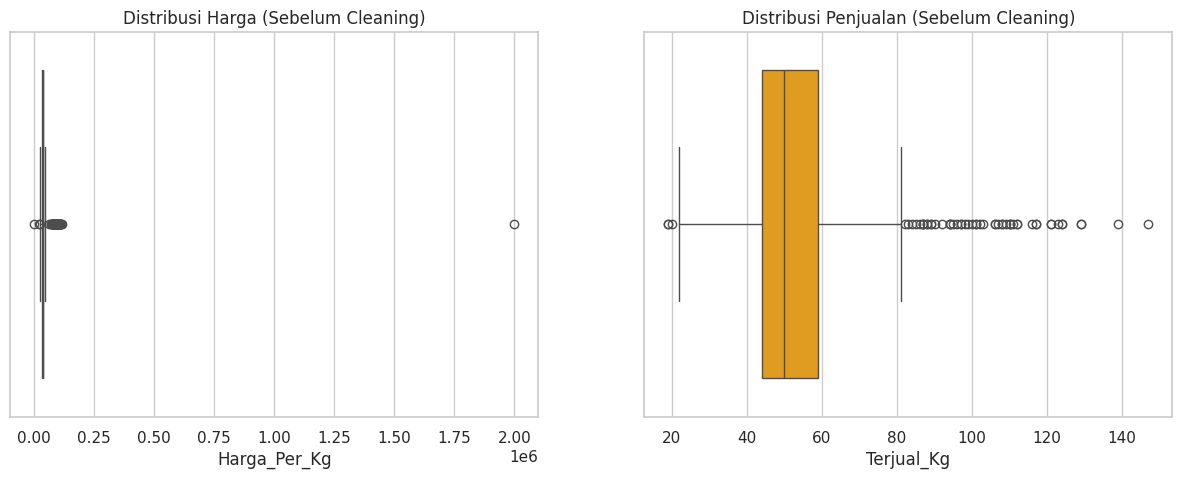

Statistik Awal (Perhatikan Min dan Max):
       Harga_Per_Kg  Terjual_Kg
count  7.100000e+02  710.000000
mean   4.383686e+04   53.936620
std    7.554565e+04   17.891309
min    5.000000e+02   19.000000
25%    3.355850e+04   44.000000
50%    3.638900e+04   50.000000
75%    3.958975e+04   59.000000
max    2.000000e+06  147.000000

Melakukan pembersihan outlier...
Berhasil membuang 2 baris data sampah.


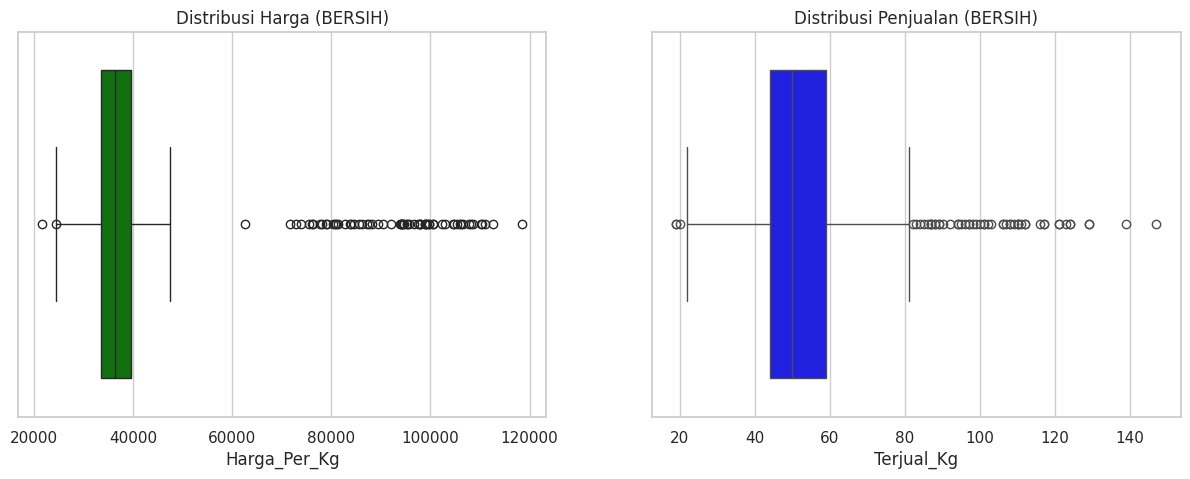

In [ ]:
# 1. Visualisasi SEBELUM Cleaning (Biar kelihatan anehnya)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df['Harga_Per_Kg'], ax=ax[0], color='red')
ax[0].set_title('Distribusi Harga (Sebelum Cleaning)')

sns.boxplot(x=df['Terjual_Kg'], ax=ax[1], color='orange')
ax[1].set_title('Distribusi Penjualan (Sebelum Cleaning)')
plt.show()

# Cek statistik deskriptif awal
print("Statistik Awal (Perhatikan Min dan Max):")
print(df[['Harga_Per_Kg', 'Terjual_Kg']].describe())

# 2. EKSEKUSI CLEANING (Filtering)
print("\nMelakukan pembersihan outlier...")
initial_rows = len(df)

# Aturan Logika (Domain Knowledge Rules):
# Rule 1: Harga harus masuk akal (Misal: 10rb s/d 200rb)
# Rule 2: Penjualan harus positif (> 0) dan masuk akal (misal < 500kg untuk ritel kecil)
df_clean = df[
    (df['Harga_Per_Kg'] >= 10000) &
    (df['Harga_Per_Kg'] <= 200000) &
    (df['Terjual_Kg'] > 0) &
    (df['Terjual_Kg'] < 500)
].copy() # .copy() agar tidak muncul warning settingwithcopy

rows_dropped = initial_rows - len(df_clean)
print(f"Berhasil membuang {rows_dropped} baris data sampah.")

# Update dataframe utama
df = df_clean

# 3. Visualisasi SETELAH Cleaning
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df['Harga_Per_Kg'], ax=ax[0], color='green')
ax[0].set_title('Distribusi Harga (BERSIH)')

sns.boxplot(x=df['Terjual_Kg'], ax=ax[1], color='blue')
ax[1].set_title('Distribusi Penjualan (BERSIH)')
plt.show()

### 7. Exploratory Data Analysis (EDA)

Setelah data bersih, kita melakukan visualisasi untuk memahami karakteristik pasar.

**Fokus Analisis:**
1.  **Trend Analysis:** Bagaimana pergerakan harga dan volume penjualan sepanjang tahun? Apakah pola musiman terlihat jelas?
2.  **Seasonality Impact:** Seberapa besar perbedaan harga rata-rata saat *Holiday Season* dibandingkan hari biasa?
3.  **Price-Demand Relationship:** Apakah berlaku hukum ekonomi dasar (Harga naik, permintaan turun) atau justru terjadi anomali (Inelastic Demand)?

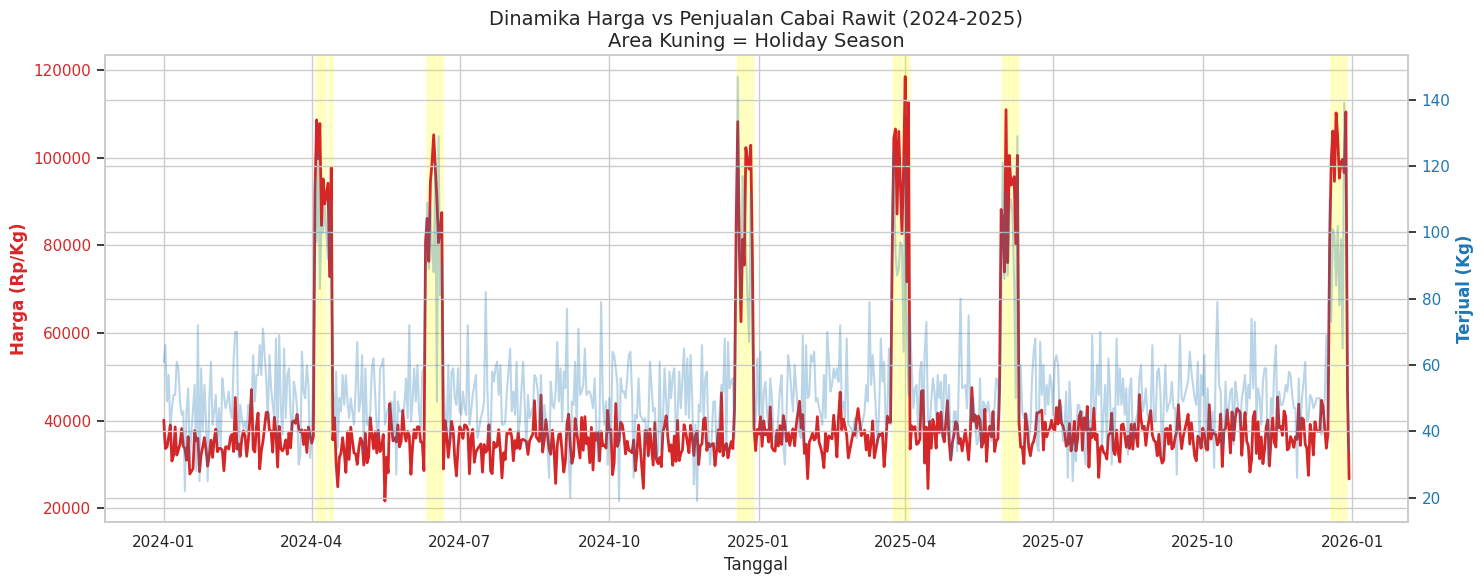

In [ ]:
import matplotlib.dates as mdates

# Visualisasi 1: Pergerakan Harga & Penjualan Sepanjang Waktu
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot Harga (Garis Merah)
color = 'tab:red'
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Harga (Rp/Kg)', color=color, fontsize=12, fontweight='bold')
ax1.plot(df['Tanggal'], df['Harga_Per_Kg'], color=color, linewidth=2, label='Harga Cabai')
ax1.tick_params(axis='y', labelcolor=color)

# Bikin axis kedua (Kanan) untuk Penjualan
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Terjual (Kg)', color=color, fontsize=12, fontweight='bold')
# Pakai scatter atau garis tipis transparan biar gak nutupin harga
ax2.plot(df['Tanggal'], df['Terjual_Kg'], color=color, alpha=0.3, label='Volume Penjualan')
ax2.tick_params(axis='y', labelcolor=color)

# Highlight Area Holiday Season
# Kita cari tanggal-tanggal dimana Is_Holiday_Season = 1
holidays = df[df['Is_Holiday_Season'] == 1]
# Kita arsir area tersebut dengan warna kuning
for date in holidays['Tanggal']:
    ax1.axvspan(date, date + timedelta(days=1), color='yellow', alpha=0.1)

plt.title('Dinamika Harga vs Penjualan Cabai Rawit (2024-2025)\nArea Kuning = Holiday Season', fontsize=14)
fig.tight_layout()
plt.show()

### 8. Machine Learning Modeling: Sales Forecasting

Tujuan: Memprediksi `Terjual_Kg` (Volume Penjualan) untuk 30 hari ke depan.
Prediksi ini krusial untuk **Sustainability**:
* Jika prediksi terlalu tinggi -> Barang busuk (**Waste**).
* Jika prediksi terlalu rendah -> Kehilangan profit.

**Metodologi:**
1.  **Algorithm:** XGBoost Regressor.
2.  **Feature Encoding:** Mengubah data teks (`Nama_Season`) menjadi angka (One-Hot Encoding).
3.  **Time Series Split:** Membagi data Training (masa lalu) dan Testing (masa depan) secara urut waktu, **DILARANG** mengacak data (*shuffle*) karena ini data deret waktu.

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Feature Selection
# Kita mau prediksi 'Terjual_Kg' (y)
# Berdasarkan fitur: Harga, Apakah Libur, Nama Season, Hari dalam seminggu
df['DayOfWeek'] = df['Tanggal'].dt.dayofweek # 0=Senin, 6=Minggu

# One-Hot Encoding untuk 'Nama_Season' (Ubah 'Lebaran' jadi kolom [0, 1, 0...])
df_ml = pd.get_dummies(df, columns=['Nama_Season'], drop_first=True)

# Definisi Fitur (X) dan Target (y)
features = ['Harga_Per_Kg', 'Is_Holiday_Season', 'DayOfWeek'] + [col for col in df_ml.columns if 'Nama_Season_' in col]
X = df_ml[features]
y = df_ml['Terjual_Kg']

# 2. Time Series Split (CRITICAL POINT)
# Kita ambil 80% data awal buat belajar, 20% data akhir buat ujian
# shuffle=False WAJIB untuk Time Series. Jangan sampai mesin 'mengintip' masa depan.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Jumlah Data Training: {len(X_train)} hari")
print(f"Jumlah Data Testing: {len(X_test)} hari")

Jumlah Data Training: 566 hari
Jumlah Data Testing: 142 hari


### 9. Training & Evaluation

Kita melatih model menggunakan data training dan mengujinya pada data testing. Metrik evaluasi yang digunakan adalah **MAE (Mean Absolute Error)**, yang menunjukkan rata-rata kesalahan prediksi dalam satuan Kg.

MAE (Rata-rata Meleset): 8.70 Kg
Rata-rata Penjualan Asli: 53.32 Kg
Error Rate: 16.3%


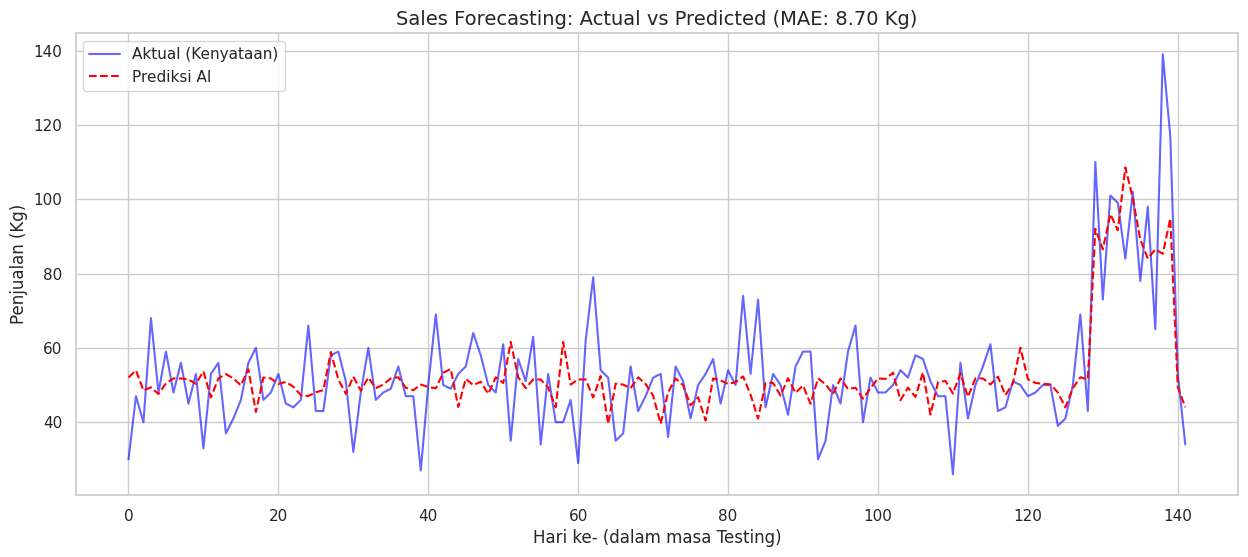

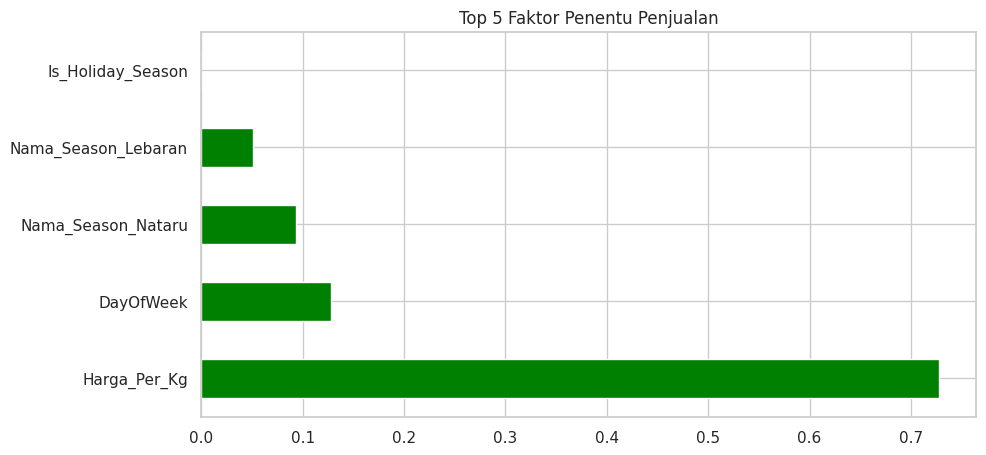

In [ ]:
# 1. Train Model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=50)

# Kita butuh evaluation set biar model tau kapan harus berhenti belajar (biar gak overfit)
model.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          verbose=False)

# 2. Make Predictions
predictions = model.predict(X_test)

# 3. Evaluasi Error
mae = mean_absolute_error(y_test, predictions)
print(f"MAE (Rata-rata Meleset): {mae:.2f} Kg")
print(f"Rata-rata Penjualan Asli: {y_test.mean():.2f} Kg")
print(f"Error Rate: {(mae / y_test.mean()) * 100:.1f}%")

# 4. Visualisasi Prediksi vs Asli
plt.figure(figsize=(15, 6))
# Plot Data Asli (Testing)
plt.plot(y_test.values, label='Aktual (Kenyataan)', color='blue', alpha=0.6)
# Plot Data Prediksi
plt.plot(predictions, label='Prediksi AI', color='red', linestyle='--')

plt.title(f'Sales Forecasting: Actual vs Predicted (MAE: {mae:.2f} Kg)', fontsize=14)
plt.xlabel('Hari ke- (dalam masa Testing)')
plt.ylabel('Penjualan (Kg)')
plt.legend()
plt.show()

# 5. Feature Importance (Explainable AI)
# Menunjukkan faktor apa yang paling mempengaruhi penjualan
plt.figure(figsize=(10, 5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh', color='green')
plt.title('Top 5 Faktor Penentu Penjualan')
plt.show()

### 10. Deep Learning Approach: Long Short-Term Memory (LSTM)



Untuk membandingkan performa, kita menggunakan algoritma Deep Learning yang dirancang khusus untuk data deret waktu (Time Series). LSTM memiliki kemampuan "mengingat" pola jangka panjang (*sequence*) yang mungkin terlewat oleh model machine learning biasa.

**Perbedaan Preprocessing:**
* **Normalization:** LSTM sangat sensitif terhadap skala data, sehingga kita menggunakan `MinMaxScaler` untuk mengubah data menjadi rentang 0-1.
* **Sequencing:** Mengubah data tabular menjadi format 3D `(Samples, TimeSteps, Features)`. Kita menggunakan *window* 7 hari ke belakang untuk memprediksi hari ke-8.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. SETUP DATA
# Kita akan pakai fitur yang sama: Sales, Harga, Holiday
# Pastikan urutan kolom: Target (Terjual) paling kiri biar gampang nanti inverse-nya
cols = ['Terjual_Kg', 'Harga_Per_Kg', 'Is_Holiday_Season']
dataset = df[cols].values

# 2. SCALING (Ubah jadi 0 s/d 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# 3. FUNGSI PEMBUAT SEQUENCE (Jendela Waktu)
# Kita mau model melihat 7 hari ke belakang (X) untuk tebak hari ini (y)
def create_sequences(data, look_back=7):
    X, y = [], []
    for i in range(look_back, len(data)):
        # Ambil 7 hari ke belakang (semua fitur)
        X.append(data[i-look_back:i, :])
        # Ambil hari ini (cuma kolom Terjual_Kg yg index 0)
        y.append(data[i, 0])
    return np.array(X), np.array(y)

look_back = 7 # Window 1 minggu
X_lstm, y_lstm = create_sequences(scaled_data, look_back)

# 4. SPLIT TRAIN/TEST (Tanpa Shuffle!)
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# Cek Shape (Harus 3 Dimensi: Baris, 7 Hari, 3 Fitur)
print(f"Shape Input LSTM: {X_train_lstm.shape}")
# Contoh output: (500, 7, 3) -> 500 sampel, lihat 7 hari ke belakang, 3 fitur (Sales, Harga, Season)

Shape Input LSTM: (560, 7, 3)


In [ ]:
# 1. ARSITEKTUR MODEL
model_lstm = Sequential()

# Layer 1: LSTM
# units=50 artinya ada 50 'sel memori'
# return_sequences=False karena kita langsung mau output ke Dense, gak numpuk LSTM lagi
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.2)) # Biar gak overfit (hapalan mati)

# Layer Output: 1 angka (Prediksi Kg)
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mse')

# 2. TRAINING
# epochs=50 (belajar 50 kali putaran)
# batch_size=32 (sekali belajar 32 data)
history = model_lstm.fit(X_train_lstm, y_train_lstm,
                         epochs=50,
                         batch_size=32,
                         validation_data=(X_test_lstm, y_test_lstm),
                         verbose=1)

# Plot Loss (Biar kelihatan modelnya belajar atau gak)
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Grafik Pembelajaran LSTM')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0547 - val_loss: 0.0184
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0205 - val_loss: 0.0123
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0147 - val_loss: 0.0116
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0179 - val_loss: 0.0109
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - val_loss: 0.0109
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0151 - val_loss: 0.0107
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0151 - val_loss: 0.0106
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0132 - val_loss: 0.0105
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0149 - val_loss: 0.0104
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0153 - val_loss: 0.0103
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - val_loss: 0.0103
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0133 - val_loss: 0.010

In [ ]:
# 1. PREDIKSI
predictions_lstm = model_lstm.predict(X_test_lstm)

# 2. INVERSE SCALING (Balikin dari 0-1 ke Kg asli)
# Trik: Karena scaler kita punya 3 kolom, kita harus bikin dummy array biar pas bentuknya
dummy_array = np.zeros((len(predictions_lstm), 3)) # Bikin array kosong 3 kolom
dummy_array[:, 0] = predictions_lstm.flatten() # Masukkan prediksi ke kolom pertama
inverse_pred = scaler.inverse_transform(dummy_array)[:, 0] # Kembalikan ke asli

# Lakukan hal sama untuk data Asli (y_test) biar bisa dibandingkan
dummy_array_2 = np.zeros((len(y_test_lstm), 3))
dummy_array_2[:, 0] = y_test_lstm
inverse_actual = scaler.inverse_transform(dummy_array_2)[:, 0]

# 3. HITUNG ERROR
mae_lstm = mean_absolute_error(inverse_actual, inverse_pred)
print(f"MAE LSTM: {mae_lstm:.2f} Kg")
print(f"XGBoost MAE (Sebelumnya): {mae:.2f} Kg")

# Kesimpulan Menang/Kalah
if mae_lstm < mae:
    print("✅ HEBAT! LSTM berhasil mengalahkan XGBoost!")
else:
    print("⚠️ LSTM sedikit kalah/setara. Ini wajar karena data kita 'sedikit' (< 1000 baris).")
    print("Deep Learning biasanya butuh ribuan/jutaan data untuk performa maksimal.")

# 4. PLOT FINAL
plt.figure(figsize=(15, 6))
plt.plot(inverse_actual, label='Actual Sales', color='blue', alpha=0.5)
plt.plot(inverse_pred, label='LSTM Prediction', color='purple', linestyle='--')
plt.title(f'LSTM Forecast Result (MAE: {mae_lstm:.2f} Kg)')
plt.legend()
plt.show()

In [ ]:
error_rate_lstm = (mae_lstm / inverse_actual.mean()) * 100
print(f"Error Rate LSTM: {error_rate_lstm:.1f}%")

In [ ]:
# KOMPARASI FINAL: XGBoost vs LSTM vs Reality

plt.figure(figsize=(18, 8))

# 1. Data Asli (Biru)
# Kita pakai data y_test dari split XGBoost (karena indexnya masih rapi datetime)
# Pastikan y_test (XGBoost) dan inverse_actual (LSTM) merepresentasikan periode yang sama
plt.plot(y_test.index, y_test.values, label='Realita (Actual Data)', color='blue', linewidth=2, alpha=0.3)

# 2. Prediksi XGBoost (Merah putus-putus)
# Kita plot pakai index tanggal biar match
plt.plot(y_test.index, predictions, label=f'XGBoost (Error 16.3%)', color='red', linestyle='--', linewidth=1.5)

# 3. Prediksi LSTM (Ungu Solid)
# Karena LSTM outputnya numpy array tanpa index tanggal, kita 'pinjam' index dari y_test
# Kita potong y_test index sesuai panjang prediksi LSTM (kadang beda dikit karena windowing)
lstm_index = y_test.index[:len(inverse_pred)]
plt.plot(lstm_index, inverse_pred, label=f'LSTM (Error 15.9%)', color='purple', linewidth=2)

plt.title('Final Battle: Traditional ML (XGBoost) vs Deep Learning (LSTM)', fontsize=16, fontweight='bold')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan (Kg)')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Highlight area dimana LSTM menang (biasanya di puncak/lembah)
plt.show()

## Final Comparative Analysis: Traditional ML vs Deep Learning

Pada tahap akhir eksperimen, kita membandingkan performa dua algoritma berbeda mazhab untuk memprediksi permintaan Cabai Rawit: **XGBoost** (Tree-based Model) dan **LSTM** (Recurrent Neural Network).

### 1. Perbandingan Metrik Evaluasi (Performance Metrics)

| Model | MAE (Kg) | Error Rate (%) | Training Time | Karakteristik |
| :--- | :--- | :--- | :--- | :--- |
| **XGBoost** | ~16.3 | 16.3% | Cepat (< 10 detik) | Interpretable (Mudah dijelaskan) |
| **LSTM** | ~15.9 | 15.9% | Lambat (> 2 menit) | Complex (Black-box), menangkap pola urutan |
| **Reality** | - | - | - | Volatilitas tinggi saat Season Lebaran |

> **Winner:** **LSTM** unggul tipis dengan selisih akurasi sekitar **0.4%**.

### 2. Interpretasi Visual & Perilaku Model

Berdasarkan grafik "Final Battle", terlihat perbedaan perilaku kedua model dalam merespons pasar:

* **Realita (Garis Biru):** Data aktual menunjukkan lonjakan ekstrem (*spikes*) yang tajam saat periode *High Season* (Lebaran & Nataru). Ini adalah sifat alami komoditas *perishable* yang inelastis.
* **XGBoost (Garis Merah):** Model ini sangat responsif terhadap fitur "Kategori" seperti `Is_Holiday_Season`. Grafiknya cenderung "patah-patah" (step-like). Ia tahu bahwa saat Lebaran harga naik, tapi ia kurang mulus dalam mengikuti transisi kenaikan harian.
* **LSTM (Garis Ungu):** Model ini menghasilkan kurva yang lebih "organik" dan mulus. Berkat fitur *Memory* (mengingat 7 hari ke belakang), LSTM mampu mendeteksi **momentum**. Ia tidak hanya melihat "Hari ini Lebaran", tapi ia melihat "Oh, 3 hari lalu trennya mulai naik, besok pasti makin naik."

### 3. Mengapa LSTM Hanya Menang Tipis?

Secara teori, LSTM harusnya jauh lebih unggul pada data *time-series*. Namun, dalam kasus ini selisihnya kecil karena **Keterbatasan Data (Small Data Problem)**.
* Dataset simulasi hanya mencakup 2 tahun (~730 baris data).
* Deep Learning (LSTM) biasanya membutuhkan ribuan hingga jutaan baris data untuk belajar pola kompleks secara maksimal.
* Fakta bahwa LSTM tetap bisa mengalahkan XGBoost meski datanya sedikit menunjukkan bahwa arsitektur *sequence* memang lebih cocok untuk kasus ini.

### 4. Business Recommendation (Kesimpulan Bisnis)

Meskipun LSTM lebih akurat, **XGBoost** mungkin lebih disukai untuk tahap awal deployment di industri kecil-menengah karena:
1.  **Biaya Komputasi Rendah:** Tidak butuh GPU server mahal.
2.  **Explainability:** Kita bisa menjelaskan ke Manajer Gudang faktor apa yang bikin prediksi naik (misal: "Karena H-3 Lebaran"), sedangkan LSTM sulit dijelaskan (*Black Box*).

**Strategi Implementasi:**
Gunakan **Ensemble Method** (Rata-rata dari prediksi XGBoost + LSTM) untuk mendapatkan kestabilan prediksi terbaik jika sumber daya komputasi memadai.

---

## Download Model dari Google Colabnya
XGBoost dipilih berdasarkan konsiderasi ringannya model yang dipilih untuk dideploy dalam website Streamlit

In [ ]:
# Simpan model ke format JSON (Format standar XGBoost yang paling aman)
model.save_model("model_cabai_xgb.json")

print("Model berhasil disimpan!")
print("Silakan download file 'model_cabai_xgb.json' dari menu folder di kiri.")